In [3]:
using GraphPlot, LightGraphs, Gadfly, PorousMaterials
include("src/moiety.jl");

In [4]:
moty = moiety("p-phenylene")
graph = moty.bonds
labels = moty.atoms.species

10-element Array{Symbol,1}:
 :C
 :C
 :C
 :C
 :C
 :C
 :H
 :H
 :H
 :H

In [8]:
CPK_COLORS = Dict([
        :H => colorant"white"
        :C => colorant"gray50"
        :N => colorant"royalblue"
        :O => colorant"red"
        :S => colorant"yellow"
        :P => colorant"purple"
        :F => colorant"lightgreen"
        :Cl => colorant"green3"
        :Br => colorant"darkred"
        :I => colorant"purple3"
        :He => colorant"lightblue"
        :Ne => colorant"lightblue"
        :Ar => colorant"lightblue"
        :Kr => colorant"lightblue"
        :Xe => colorant"lightblue"
        :B => colorant"orange"
        :Li => colorant"violet"
        :Na => colorant"violet"
        :K => colorant"violet"
        :Rb => colorant"violet"
        :Cs => colorant"violet"
        :Be => colorant"green"
        :Mg => colorant"green"
        :Ca => colorant"green"
        :Sr => colorant"green"
        :Ba => colorant"green"
        :Ti => colorant"gray80"
        :Fe => colorant"darkorange"
        ])

Dict{Symbol,ColorTypes.RGB{FixedPointNumbers.Normed{UInt8,8}}} with 28 entries:
  :Cl => RGB{N0f8}(0.0,0.804,0.0)
  :F  => RGB{N0f8}(0.565,0.933,0.565)
  :Be => RGB{N0f8}(0.0,0.502,0.0)
  :Cs => RGB{N0f8}(0.933,0.51,0.933)
  :Ti => RGB{N0f8}(0.8,0.8,0.8)
  :B  => RGB{N0f8}(1.0,0.647,0.0)
  :Na => RGB{N0f8}(0.933,0.51,0.933)
  :Ar => RGB{N0f8}(0.678,0.847,0.902)
  :Rb => RGB{N0f8}(0.933,0.51,0.933)
  :Kr => RGB{N0f8}(0.678,0.847,0.902)
  :K  => RGB{N0f8}(0.933,0.51,0.933)
  :Mg => RGB{N0f8}(0.0,0.502,0.0)
  :S  => RGB{N0f8}(1.0,1.0,0.0)
  :Ca => RGB{N0f8}(0.0,0.502,0.0)
  :Ne => RGB{N0f8}(0.678,0.847,0.902)
  :N  => RGB{N0f8}(0.255,0.412,0.882)
  :Sr => RGB{N0f8}(0.0,0.502,0.0)
  :Br => RGB{N0f8}(0.545,0.0,0.0)
  :Xe => RGB{N0f8}(0.678,0.847,0.902)
  :P  => RGB{N0f8}(0.502,0.0,0.502)
  :I  => RGB{N0f8}(0.49,0.149,0.804)
  :Li => RGB{N0f8}(0.933,0.51,0.933)
  :H  => RGB{N0f8}(1.0,1.0,1.0)
  :Ba => RGB{N0f8}(0.0,0.502,0.0)
  :Fe => RGB{N0f8}(1.0,0.549,0.0)
  ⋮   => ⋮

In [9]:
[color for color in values(CPK_COLORS)]

In [10]:
function color_choice(symbol)
    if symbol in keys(CPK_COLORS)
        return CPK_COLORS[symbol]
    end
    return colorant"pink"
end

color_choice (generic function with 1 method)

In [11]:
colors = [color_choice(label) for label in labels]

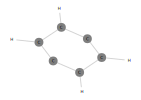

In [12]:
gplot(graph, nodelabel=labels, nodefillc=colors)

In [13]:
xtal = Crystal("IRMOF-1_one_ring.cif")

┌ Info: Crystal IRMOF-1_one_ring.cif has  space group. I am converting it to P1 symmetry.
│         To afrain from this, pass `convert_to_p1=false` to the `Crystal` constructor.
└ @ PorousMaterials C:\Users\eahen\.julia\dev\PorousMaterials\src\crystal.jl:426


Name: IRMOF-1_one_ring.cif
Bravais unit cell of a crystal.
	Unit cell angles α = 90.000000 deg. β = 90.000000 deg. γ = 90.000000 deg.
	Unit cell dimensions a = 25.832000 Å. b = 25.832000 Å, c = 25.832000 Å
	Volume of unit cell: 17237.492730 Å³

	# atoms = 51
	# charges = 0
	chemical formula: Dict(:Zn2 => 1,:H54 => 1,:H59 => 1,:O35 => 1,:C55 => 1,:O60 => 1,:O40 => 1,:C42 => 1,:C103 => 1,:O81 => 1…)
	space Group: P1
	symmetry Operations:
		'x, y, z'


In [14]:
strip_numbers_from_atom_labels!(xtal)
infer_bonds!(xtal, true)

In [15]:
colors = [color_choice(label) for label in xtal.atoms.species]

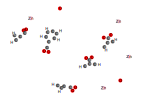

In [16]:
gplot(xtal.bonds, nodelabel=xtal.atoms.species, nodefillc=colors, edgestrokec=colorant"white")